# Project Content

1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 1.2 [Recognizing Variables In Dataset](#3)


2. [First Organization](#4)
    * 2.1 [Required Python Libraries](#5)
    * 2.2 [Loading the Dataset](#6)
    * 2.3.[Initial analysis on the dataset](#7)

3. [Preparation for Exploratory Data Analysis (EDA)](#8)
    * 3.1 [Examining Missing Values](#9)
    * 3.2 [Examining Unique Values](#10)
    * 3.3 [Examining Statistics of Variables](#11)

4. [Exploratory Data Analysis(EDA)](#12)
    * 4.1 [Uni-variate Analysis](#13)
    * 4.2 [Missing Values](#14)
    * 4.3 [Bi-variate Analysis](#15)
    * 4.4 [Relationship Between Variables](#16)
    * 4.5 [Outliers](#17)
        - 4.5.1 [Visualization](#18)
        - 4.5.2 [Detecting Outliers](#19)
        - 4.5.2 [Handling Outliers](#20)
    * 4.6 [Data Distribution](#21)
    * 4.7 [Scaling Data](#22)

## 1. Introduction <a name = 1 ></a>

### 1.1 Examining the Project Topic <a name = 3></a>

The objective of the project is to build a reliable and robust ML classification algorithm in order to predict whether or not a patient has diabetes, based in given features/diagnostic measurements.

Some considerations:

- Only female patients are considered with at least 21 years old of Prima Indian hertiage.

- The dataset was taken from the publication [Using the ADAP Learning Algorithm to Forecast the Onset of Diabetes Mellitus](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/). The original publication can be found in the References folder within this project.
- Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**NOTE**: This dataset has a controversial background, as highlighted in this [journal](https://www.journals.uchicago.edu/doi/full/10.1086/693853) (and can be found in the References folder within this project). I am firmly against any discriminatory behaviors based on ethnicity or gender. My use of this dataset is purely for educational purposes, as it presents certain challenges I wish to overcome, such as a big cluster of missing data within its features. It's crucial to approach ML/AI topics with care and responsibility.

### 1.2 Recognizing Variables In Dataset

The datasets consists of several medical predictor variables and one target variable, **Outcome**.

Here are the columns present in the dataset:

- **Pregnancies**: Number of times pregnant.
- **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
- **BloodPressure**: Diastolic blood pressure (mm Hg).
- **SkinThickness**: Triceps skin fold thickness (mm).
- **Insulin**: 2-Hour serum insulin (mu U/ml).
- **BMI**: Body mass index (weight in kg/(height in m)^2).
- **DiabetesPedigreeFunction**: Diabetes pedigree function.
- **Age**: Age in years.
- **Outcome**: Class variable (0 or 1), where 1 indicates the presence of diabetes.

## 2. First Organization <a name = 4></a>


### 2.1 Required Python Libraries<a name = 5></a>


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Loading the Dataset<a name = 6 ></a>


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"stefani09","key":"d787bc27a2362f99877d2a3f791546b7"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d uciml/pima-indians-diabetes-database/

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 24.6MB/s]


In [ ]:
!unzip /content/pima-indians-diabetes-database.zip

Archive:  /content/pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
df = pd.read_csv('/content/diabetes.csv')

### 2.3 Initial analysis on the dataset <a name = 7></a>

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


We have a dataset that is organized in 768 rows and 9 columns.

In [ ]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (768, 9)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From this initial observation, several columns have a minimum value of 0, which is unrealistic for metrics like **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, and **BMI**. These could potentially be due to missing or unrecorded data.

## 3. Preparation for Exploratory Data Analysis (EDA) <a name = 8></a>


### 3.1 Examining Missing Values<a name = 9></a>

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### 3.2 Examining Unique Values<a name = 10></a>


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


**Pregnancy** is a challenging feature because it cannot be interpreted as either numerical or categorical value. In fact, people working with this database seem to have differing opinions on this issue. I will begin by treating this feature as a numerical value, but I will also explore its inclusion as a categorical value in other notebooks within this project (**pregnancies_feature-categorical-or-numerical**).

In [ ]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### 3.3 Examining Statistics of Variables<a name = 11></a>

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- **Pregnancies**: Varies from 0 to 17 with a mean of around 3.85.
- **Glucose**: Ranges from 0 to 199 with a mean of 120.89. (Note: A value of 0 will be consider as missing data because its unrealistic).
- **BloodPressure**: Ranges from 0 to 122 with a mean of 69.10. (A value of 0 = same as Glucose).
- **SkinThickness**: Varies from 0 to 99 with an average of 20.54. (A value of 0 might = same as Glucose).
- **Insulin**: Ranges from 0 to 846 with a mean of 79.80. (A value of 0 = same as Glucose).
- **BMI**: Ranges from 0 to 67.1 with an average of 31.99. (A value of 0 = same as Glucose).
- **DiabetesPedigreeFunction**: Ranges from 0.078 to 2.42 with a mean of 0.47.
- **Age**: Ranges from 21 to 81 with a mean age of 33.24.
- **Outcome**: It's a binary variable with values 0 or 1. Approximately 34.9% of the samples have diabetes (outcome=1).

As mentioned earlier, the 0 values for features such as Glucose, Blood Pressure, BMI, Insulin, and Skin Thickness lack common sense. Therefore, further corrections will be made regarding this issue.

## 4. Exploratory Data Analysis (EDA)<a name = 12></a>

### 4.1 Uni-variate analysis <a name = 13></a>

**FEATURES**

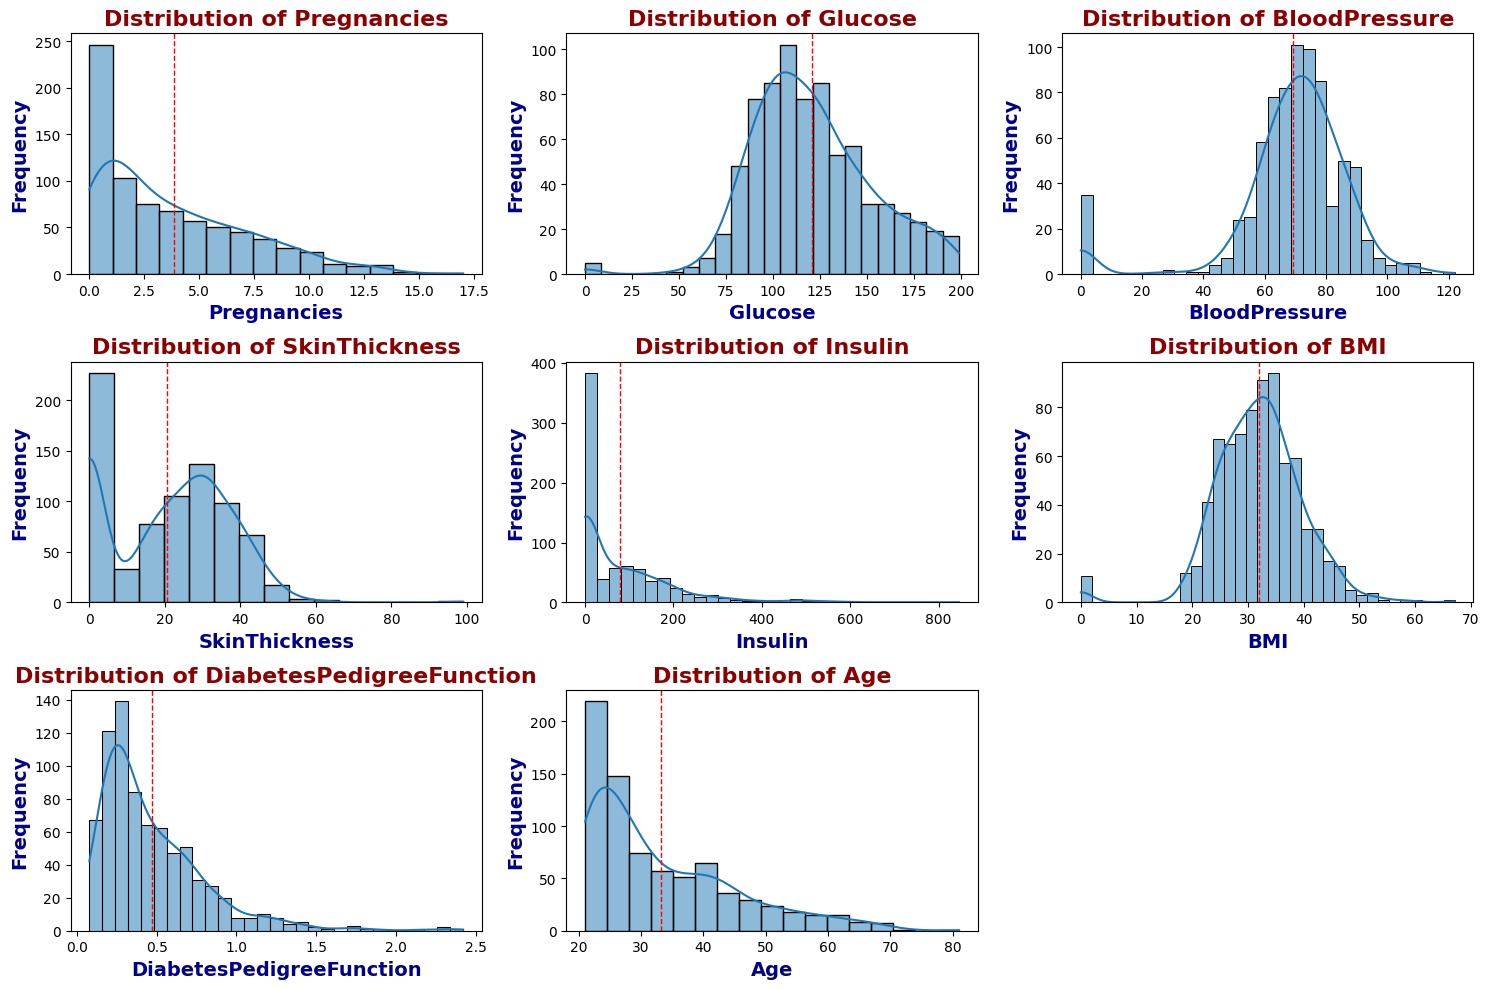

In [76]:
title_font = {"color" : "darkred", "weight" : "bold", "size" : 16}
axis_font = {"color" : "darkblue", "weight" : "bold", "size" : 14}

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot distributions for each column
for i, col in enumerate(df.columns[:-1], 1):  # Exclude the 'Outcome' column for now
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1)  # Mean
    plt.title(f'Distribution of {col}', fontdict = title_font)
    plt.xlabel(col, fontdict = axis_font)
    plt.ylabel('Frequency', fontdict = axis_font)

# Adjust layout
plt.tight_layout()
plt.show()

- **Pregnancies**: Most women in the dataset have had 0-2 pregnancies, with a decreasing number of occurrences as the number of pregnancies increases.
- **Glucose**: A peak near zero suggests potential missing values. The distribution has a somewhat normal shape around the mean.
- **BloodPressure**: Similar to glucose, there's a peak near zero, which could point out missing values. Apart from that, the distribution seems fairly normal.
- **SkinThickness**: A significant number of values are recorded as zero, same as previous features. The rest of the data seems to be somewhat normally distributed.
- **Insulin**: A large number of values are zero, with a long tail suggesting a few high values or potential outliers.
- **BMI**: There's a peak near zero, again suggesting potential missing values. The distribution is slightly right-skewed with most values around 20-40.
- **DiabetesPedigreeFunction**: The distribution seems close to normal with most values less than 1.
- **Age**: Majority of the individuals are between 20 and 40 years old.

**Distribution**


---
1. Variables like **Insulin**, **DiabetesPedigreeFunction**, and **Age** have strong right skewness and may benefit from strong transformations like the log or Box-Cox transformations.
2. **Pregnancies** and **BloodPressure** are also right-skewed and may benefit from transformations.
3. **Glucose**, **SkinThickness**, and **BMI** have less significant skewness and may require minor or no transformation.


**TARGET**

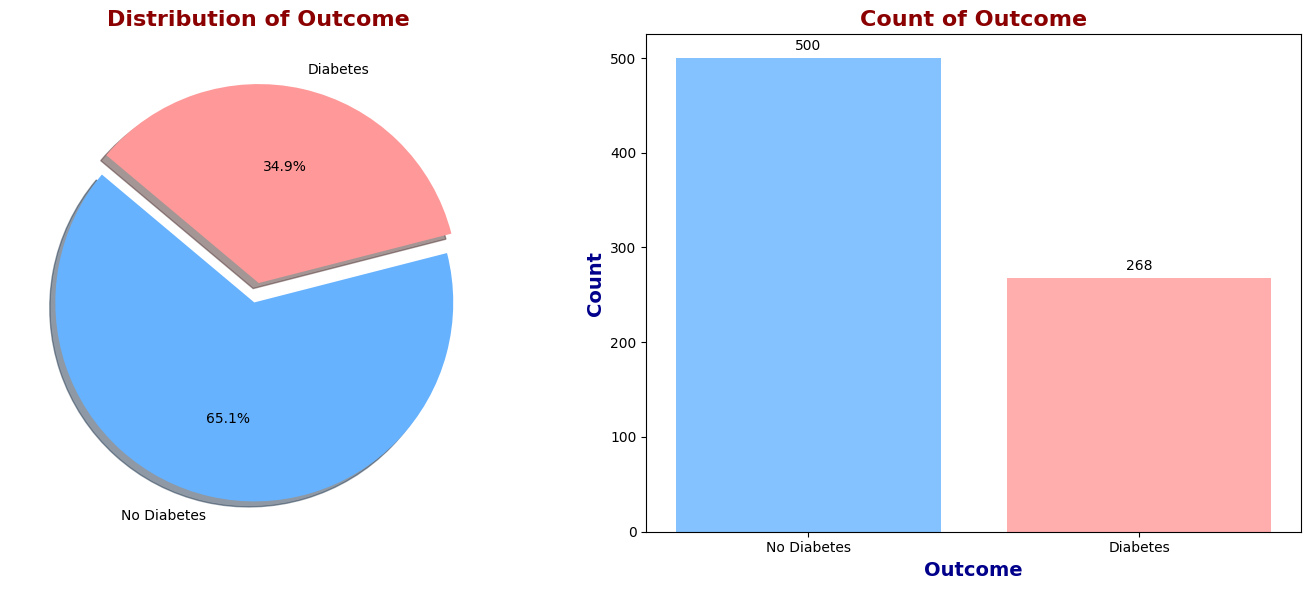

In [ ]:
# Colors and labels
colors = ['#66b2ff', '#ff9999']
labels = ['No Diabetes', 'Diabetes']
explode = (0.1, 0)  # explode 1st slice for better visualization
outcome_counts = df['Outcome'].value_counts()

# Create a new figure for the plots
plt.figure(figsize=(14, 6))

# Pie Chart
plt.subplot(1, 2, 1)
plt.pie(outcome_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Outcome', fontdict=title_font)

# Bar Chart
plt.subplot(1, 2, 2)
bars = plt.bar(outcome_counts.index, outcome_counts.values, color=colors, alpha=0.8)
plt.title('Count of Outcome', fontdict=title_font)
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.ylabel('Count', fontdict=axis_font)
plt.xlabel('Outcome', fontdict=axis_font)

# Add counts on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(int(height)),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- **No Diabetes**: This category represents the majority of the dataset, with approximately 65.1% [500 individuals] of individuals not diagnosed with diabetes.
- **Diabetes**: The remaining 34.9% [268 individuals] of the dataset consists of individuals diagnosed with diabetes.

### 4.2 Missing Values <a name = 14></a>

As it was before stated, the presence of zeros in certain columns (like Glucose, BloodPressure, SkinThickness, Insulin, and BMI) will be refered as missing values, as they are biologically implausible values for these measurements.

In [66]:
# Columns where zeros are suspicious
suspicious_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN in those columns
data_cleaned = df.copy()
for col in suspicious_zero_cols:
    data_cleaned[col].replace(0, float('nan'), inplace=True)

# Check for the number of NaN values in the dataset after replacement
isnull_number = []
for i in data_cleaned.columns:
    x = data_cleaned[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = data_cleaned.columns, columns = ["Total Missing Values"])

,Total Missing Values
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


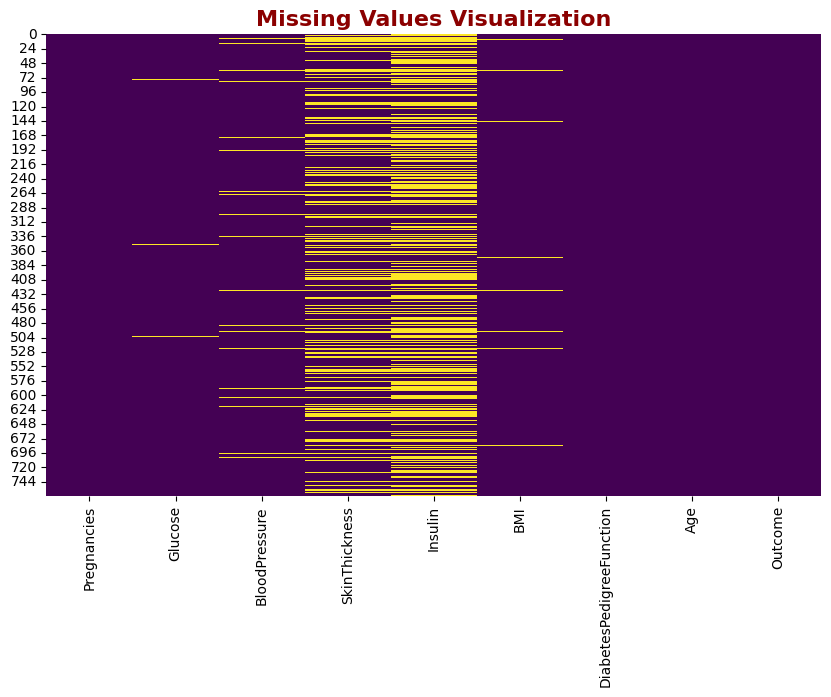

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization', fontdict=title_font)
plt.show()

The columns with the most missing values are Insulin and SkinThickness, with 374 and 227 missing values, respectively. Given the size of the dataset, these counts represent a significant portion of the data.

- For columns with relatively fewer missing values (like Glucose, BloodPressure, and BMI), I will use the median or mean to replace them.
- For columns with a large number of missing values (like Insulin and SkinThickness), I will use k-NN imputation method.

**Imputation: MEAN for Glucose, Blood Pressure and BMI**

---


In [57]:
# List of columns with relatively fewer missing values for imputation
cols_to_impute = ['Glucose', 'BloodPressure', 'BMI']

# Impute missing values with median for these columns
for col in cols_to_impute:
    median_value = data_cleaned[col].median()
    data_cleaned[col].fillna(median_value, inplace=True)

# Check for the number of NaN values in the dataset after replacement
isnull_number = []
for i in data_cleaned.columns:
    x = data_cleaned[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = data_cleaned.columns, columns = ["Total Missing Values"])

,Total Missing Values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,227
Insulin,374
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**k-NN: SkinThickness and Insulin**

---

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

#Inspired by: https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

# Step 1: Scale the data using a standard scaler

# Initialize the scaler
scaler = StandardScaler()

# Separate the Outcome column to avoid scaling it
X = data_cleaned.drop(columns=['Outcome'])
y = data_cleaned['Outcome']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.558557,NaN,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.014657,NaN,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,NaN,NaN,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.587871,-0.518847,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.558557,0.104968,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,1.800521,0.206127,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.205728,NaN,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.587871,-0.367108,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,NaN,NaN,-0.342790,-0.371101,1.170732


In [59]:
# Step 2: Perform k-NN imputation on the scaled data

#Inspired by: https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
X_imputed_scaled = imputer.fit_transform(X_scaled_df)

# Convert imputed data back to DataFrame
X_imputed_scaled_df = pd.DataFrame(X_imputed_scaled, columns=X.columns)
X_imputed_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.558557,0.920984,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.014657,-0.761629,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,0.138200,0.359551,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.587871,-0.518847,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.558557,0.104968,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,1.800521,0.206127,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.205728,-0.230543,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.587871,-0.367108,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.186621,-0.016423,-0.342790,-0.371101,1.170732


In [60]:
# Step 3: Inverse-transform the scaled data to its original scale

X_imputed = scaler.inverse_transform(X_imputed_scaled_df)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
X_imputed_df = pd.concat([X_imputed_df, df['Outcome']], axis=1)

# Check the first few rows of the imputed dataset
X_imputed_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,264.8,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,65.2,26.6,0.351,31.0,0
2,8.0,183.0,64.0,30.6,198.2,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,128.2,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,27.2,153.6,30.1,0.349,47.0,1


In [61]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [69]:
isnull_number = []
for i in X_imputed_df.columns:
    x = X_imputed_df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### 4.3 Bi-variate analysis <a name = 15></a>

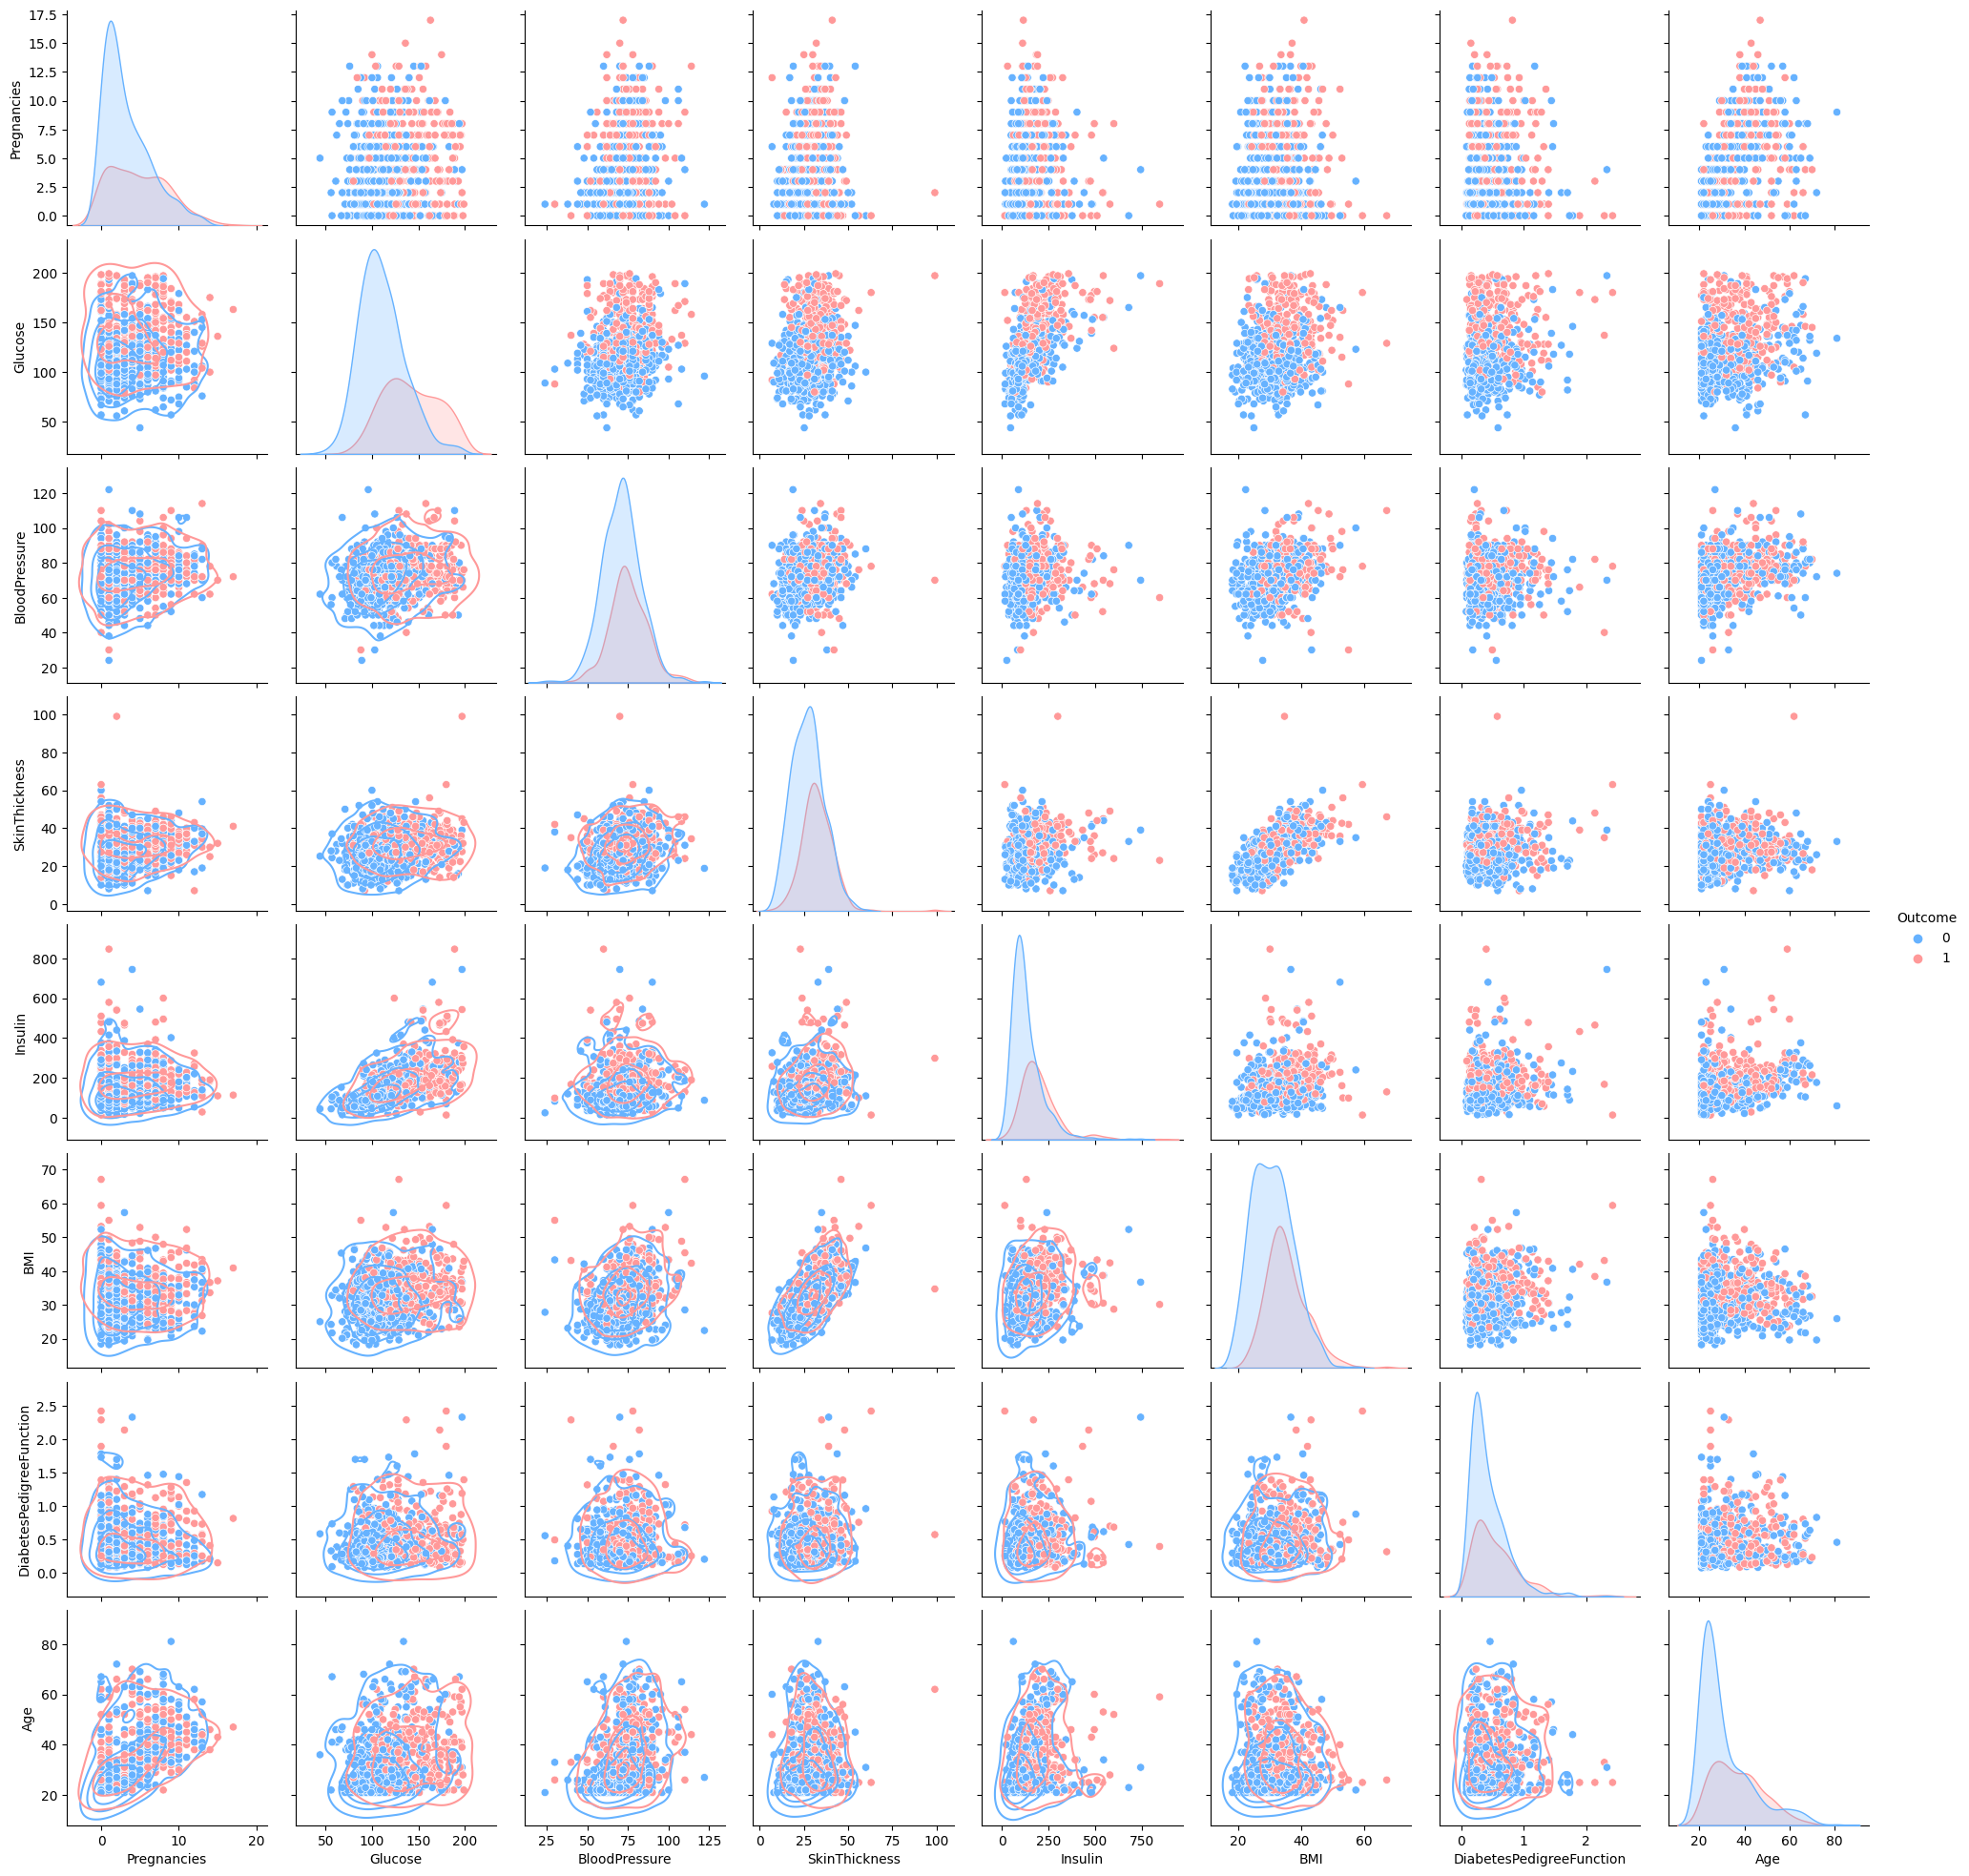

In [70]:
colors = ['#66b2ff', '#ff9999']

graph = sns.pairplot(X_imputed_df, diag_kind = 'kde', hue='Outcome', palette=colors,)
graph.map_lower(sns.kdeplot, levels = 4, color = '.2')
plt.show()

**Plot explanation**


---
1. Diagonal: The diagonal plots are Kernel Density Estimates (KDEs), providing the distribution of individual features. KDEs can offer insights about the shape, spread, and modality of the distribution.
2. Upper triangle: Displays scatter plots, as before, showing relationships between pairs of features.
3. Lower triangle: Contains 2D KDE plots, giving a sense of the joint density distribution of two features. Darker areas signify higher densities of data points. This visualization helps to identify regions of high concentration and can be especially useful for identifying clusters or patterns that differentiate outcomes.

**Analysis**


---
1. Pregnancies:
    * On the diagonal, we observe that people with diabetes seem to have a slightly higher density around higher numbers of pregnancies.
    * This suggests that a higher number of pregnancies might be associated with an increased risk of diabetes.

2. Glucose:
     * People with diabetes show a clear shift towards higher glucose levels in the KDE.

3. BloodPressure:
    * Both outcomes have somewhat similar distributions for blood pressure, with no major differentiation.

4. SkinThickness and Insulin:
    * Individuals with diabetes seem to have a slightly higher density towards increased skin thickness and insulin levels.

5. BMI:
    * The density for individuals with diabetes is shifted towards higher BMI values.This suggests that a higher BMI might be associated with a higher risk of diabetes.

6. DiabetesPedigreeFunction:
    * There's a slight indication that people with diabetes have a higher diabetes pedigree function value.

7. Age:
    * Older individuals seem more likely to have diabetes, as seen from the shift in the KDE for positive outcomes towards the right.

* Example of some interesting interactions in the 2D KDE plots:
   1. The plot between Glucose and Age shows that older individuals with higher glucose levels are more likely to have diabetes.
   2. Similarly, the plot between BMI and Age shows a pattern where older individuals with higher BMI values are more prone to diabetes.



### 4.4 Relationship between Variables<a name = 16></a>

In [71]:
correlation_matrix = X_imputed_df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.122018,0.099327,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.215945,0.605861,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.212667,0.147417,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.122018,0.215945,0.212667,1.000000,0.236478,0.660167,0.125776,0.128356,0.265847
Insulin,0.099327,0.605861,0.147417,0.236478,1.000000,0.284942,0.156432,0.278341,0.335246
BMI,0.021559,0.231049,0.281257,0.660167,0.284942,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.125776,0.156432,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.128356,0.278341,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.265847,0.335246,0.312038,0.173844,0.238356,1.000000


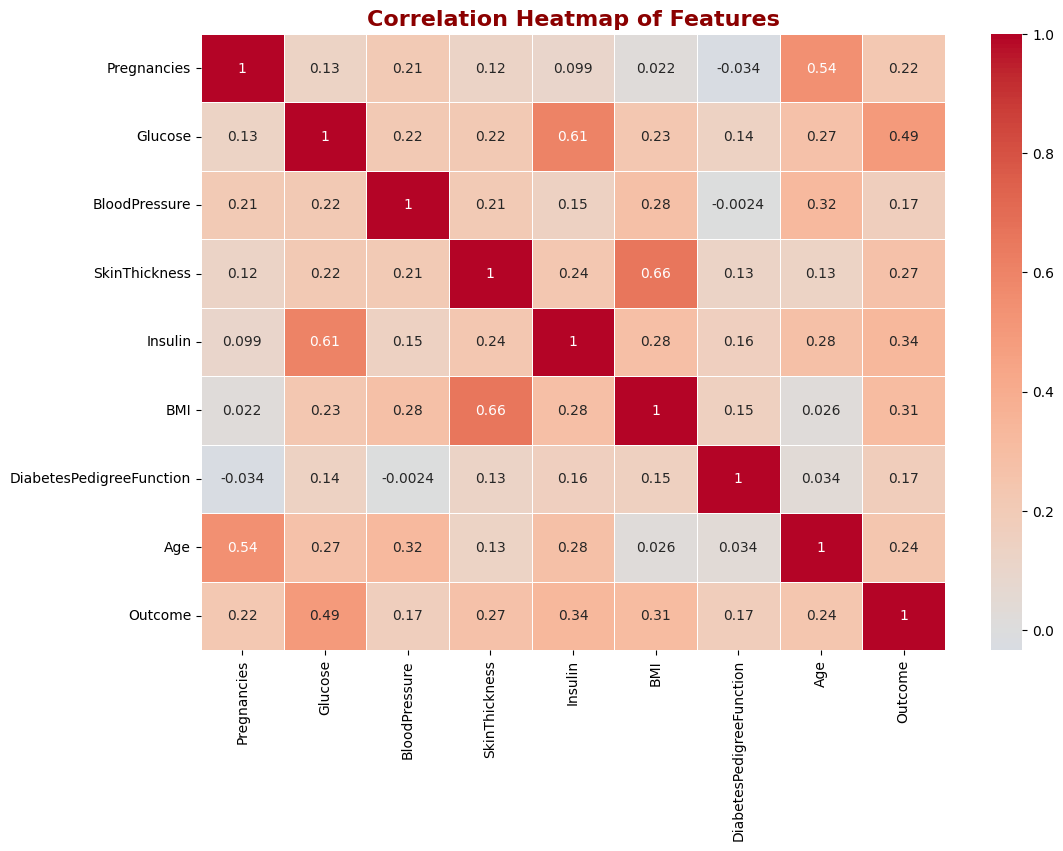

In [72]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontdict=title_font)
plt.show()

In [73]:
sorted_correlation = correlation_matrix['Outcome'].sort_values(ascending = False)
sorted_correlation = pd.DataFrame(sorted_correlation).rename(columns={"Outcome": "Correlation wrt Outcome"})
sorted_correlation

,Correlation wrt Outcome
Outcome,1.000000
Glucose,0.492782
Insulin,0.335246
BMI,0.312038
SkinThickness,0.265847
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
BloodPressure,0.165723


**Interpretation**


---


1. As expected, **Glucose** has the highest positive correlation with **diabetes** outcome. An increase in glucose levels typically relates to a higher chance of having diabetes.
2. Other features like **Insulin**, **BMI**, and **SkinThickness** also show moderate positive correlations with the diabetes outcome.
3. Features like **BloodPressure** and **DiabetesPedigreeFunction** have lower correlations, but they still might be significant in predicting diabetes.

### 4.5 Outliers<a name = 17></a>

#### 4.5.1 Visualization<a name = 18></a>

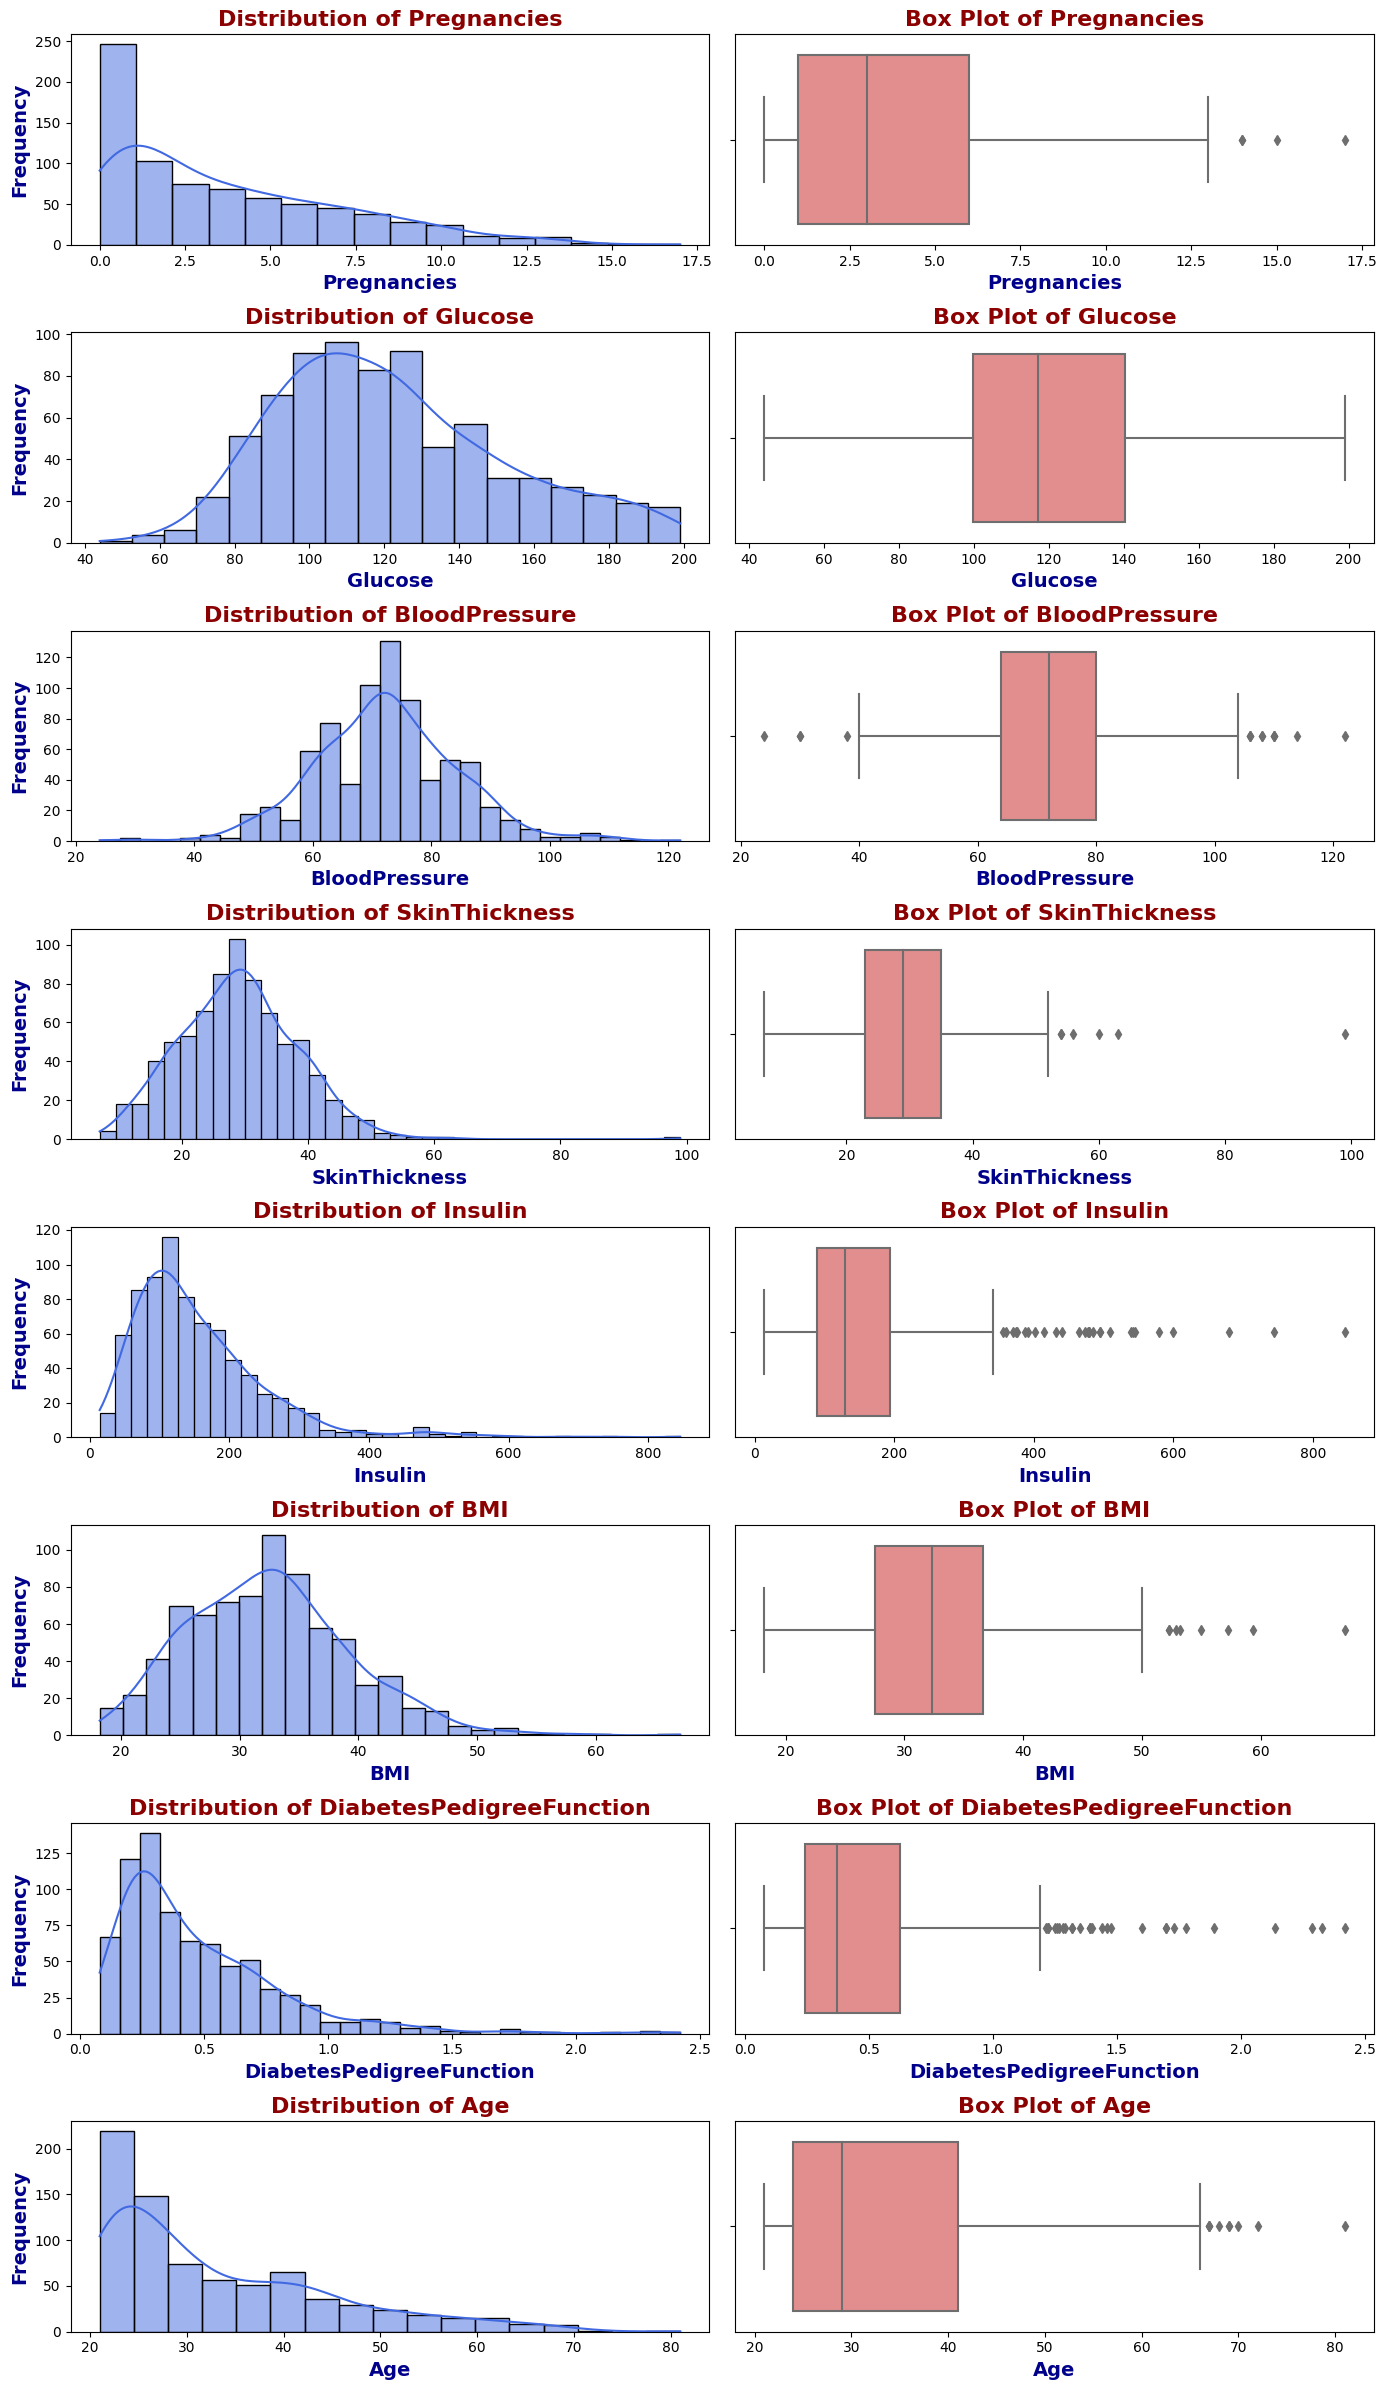

In [80]:
# Visualize distributions using histograms and box plots
fig, axes = plt.subplots(nrows=len(X_imputed_df.columns) - 1, ncols=2, figsize=(14, 24)) #Exclude 'Outcome'

for i, column in enumerate(X_imputed_df.columns.drop('Outcome')):
    sns.histplot(X_imputed_df[column], ax=axes[i, 0], kde=True, color='royalblue')
    axes[i, 0].set_title(f'Distribution of {column}', fontdict=title_font)
    axes[i, 0].set_ylabel('Frequency', fontdict=axis_font)
    axes[i, 0].set_xlabel(column, fontdict=axis_font)

    sns.boxplot(x=X_imputed_df[column], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Box Plot of {column}', fontdict=title_font)
    axes[i, 1].set_xlabel(column, fontdict=axis_font)

plt.tight_layout()
plt.show()

**From the plots**


---
1. **Pregnancies:** Right-skewed distribution with potential outliers on the higher end.
2. **Glucose:** Approximately normal, but with potential outliers on the lower end.
3. **BloodPressure:** Approximately normal with potential outliers on both the lower and higher ends.
4. **SkinThickness:** Right-skewed distribution with potential outliers on the higher end.
5. **Insulin:** Right-skewed distribution with a large number of potential outliers on the higher end.
6. **BMI:** Approximately normal, but with potential outliers on the higher end.
7. **DiabetesPedigreeFunction:** Right-skewed with potential outliers on the higher end.
8. **Age:** Right-skewed distribution.

#### 4.5.2 Detecting Outliers<a name = 19></a>

**IQR to detect outliers**


---



In [83]:
iqr_outliers = {}

for col in X_imputed_df.drop(columns=['Outcome']):
    Q1 = X_imputed_df[col].quantile(0.25)
    Q3 = X_imputed_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers[col] = (X_imputed_df[col] < lower_bound) | (X_imputed_df[col] > upper_bound)

# Create a DataFrame to show the count of outliers detected by the IQR method
iqr_outliers_count = pd.DataFrame({'IQR Method': [outliers_data.sum() for outliers_data in iqr_outliers.values()]}, index=iqr_outliers.keys())
iqr_outliers_count

,IQR Method
Pregnancies,4
Glucose,0
BloodPressure,14
SkinThickness,6
Insulin,28
BMI,8
DiabetesPedigreeFunction,29
Age,9


#### 4.5.3 Handling Outliers<a name = 20></a>

**Handling Outliers with winsorized method**


---

In [84]:
from scipy import stats
from scipy.stats.mstats import winsorize

In [85]:
# Apply Winsorizing to each column
data_winsorized = X_imputed_df.copy()
for column in data_winsorized.columns.drop('Outcome'):
    data_winsorized[column] = winsorize(data_winsorized[column], limits=[0.05, 0.05])

# Check the minimum and maximum values after Winsorizing to ensure the process was successful
min_values = data_winsorized.min()
max_values = data_winsorized.max()

min_values, max_values

(Pregnancies                  0.00
 Glucose                     80.00
 BloodPressure               52.00
 SkinThickness               14.00
 Insulin                     49.00
 BMI                         22.20
 DiabetesPedigreeFunction     0.14
 Age                         21.00
 Outcome                      0.00
 dtype: float64,
 Pregnancies                  10.000
 Glucose                     181.000
 BloodPressure                90.000
 SkinThickness                44.000
 Insulin                     321.000
 BMI                          44.500
 DiabetesPedigreeFunction      1.136
 Age                          58.000
 Outcome                       1.000
 dtype: float64)

In [86]:
def iqr(df, var):
    """This function will return the values greater and lower than 1.5 * IQR"""
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [89]:
def count_iqr_outliers(df):
    """Define the function to get the count of outliers using the iqr function"""
    outlier_counts = {}
    for column in df.columns.drop('Outcome'):
        outlier_counts[column] = len(iqr(df, column))
    return outlier_counts

# Get the count of outliers before and after Winsorizing
outliers_before = count_iqr_outliers(X_imputed_df)
outliers_after = count_iqr_outliers(data_winsorized)

# Convert the results to a DataFrame
outliers_df = pd.DataFrame({
    'Variable': outliers_before.keys(),
    'Outliers Before Winsorizing': outliers_before.values(),
    'Outliers After Winsorizing': outliers_after.values()
})

outliers_df

,Variable,Outliers Before Winsorizing,Outliers After Winsorizing
0,Pregnancies,4,0
1,Glucose,0,0
2,BloodPressure,14,0
3,SkinThickness,6,0
4,Insulin,28,0
5,BMI,8,0
6,DiabetesPedigreeFunction,29,0
7,Age,9,0


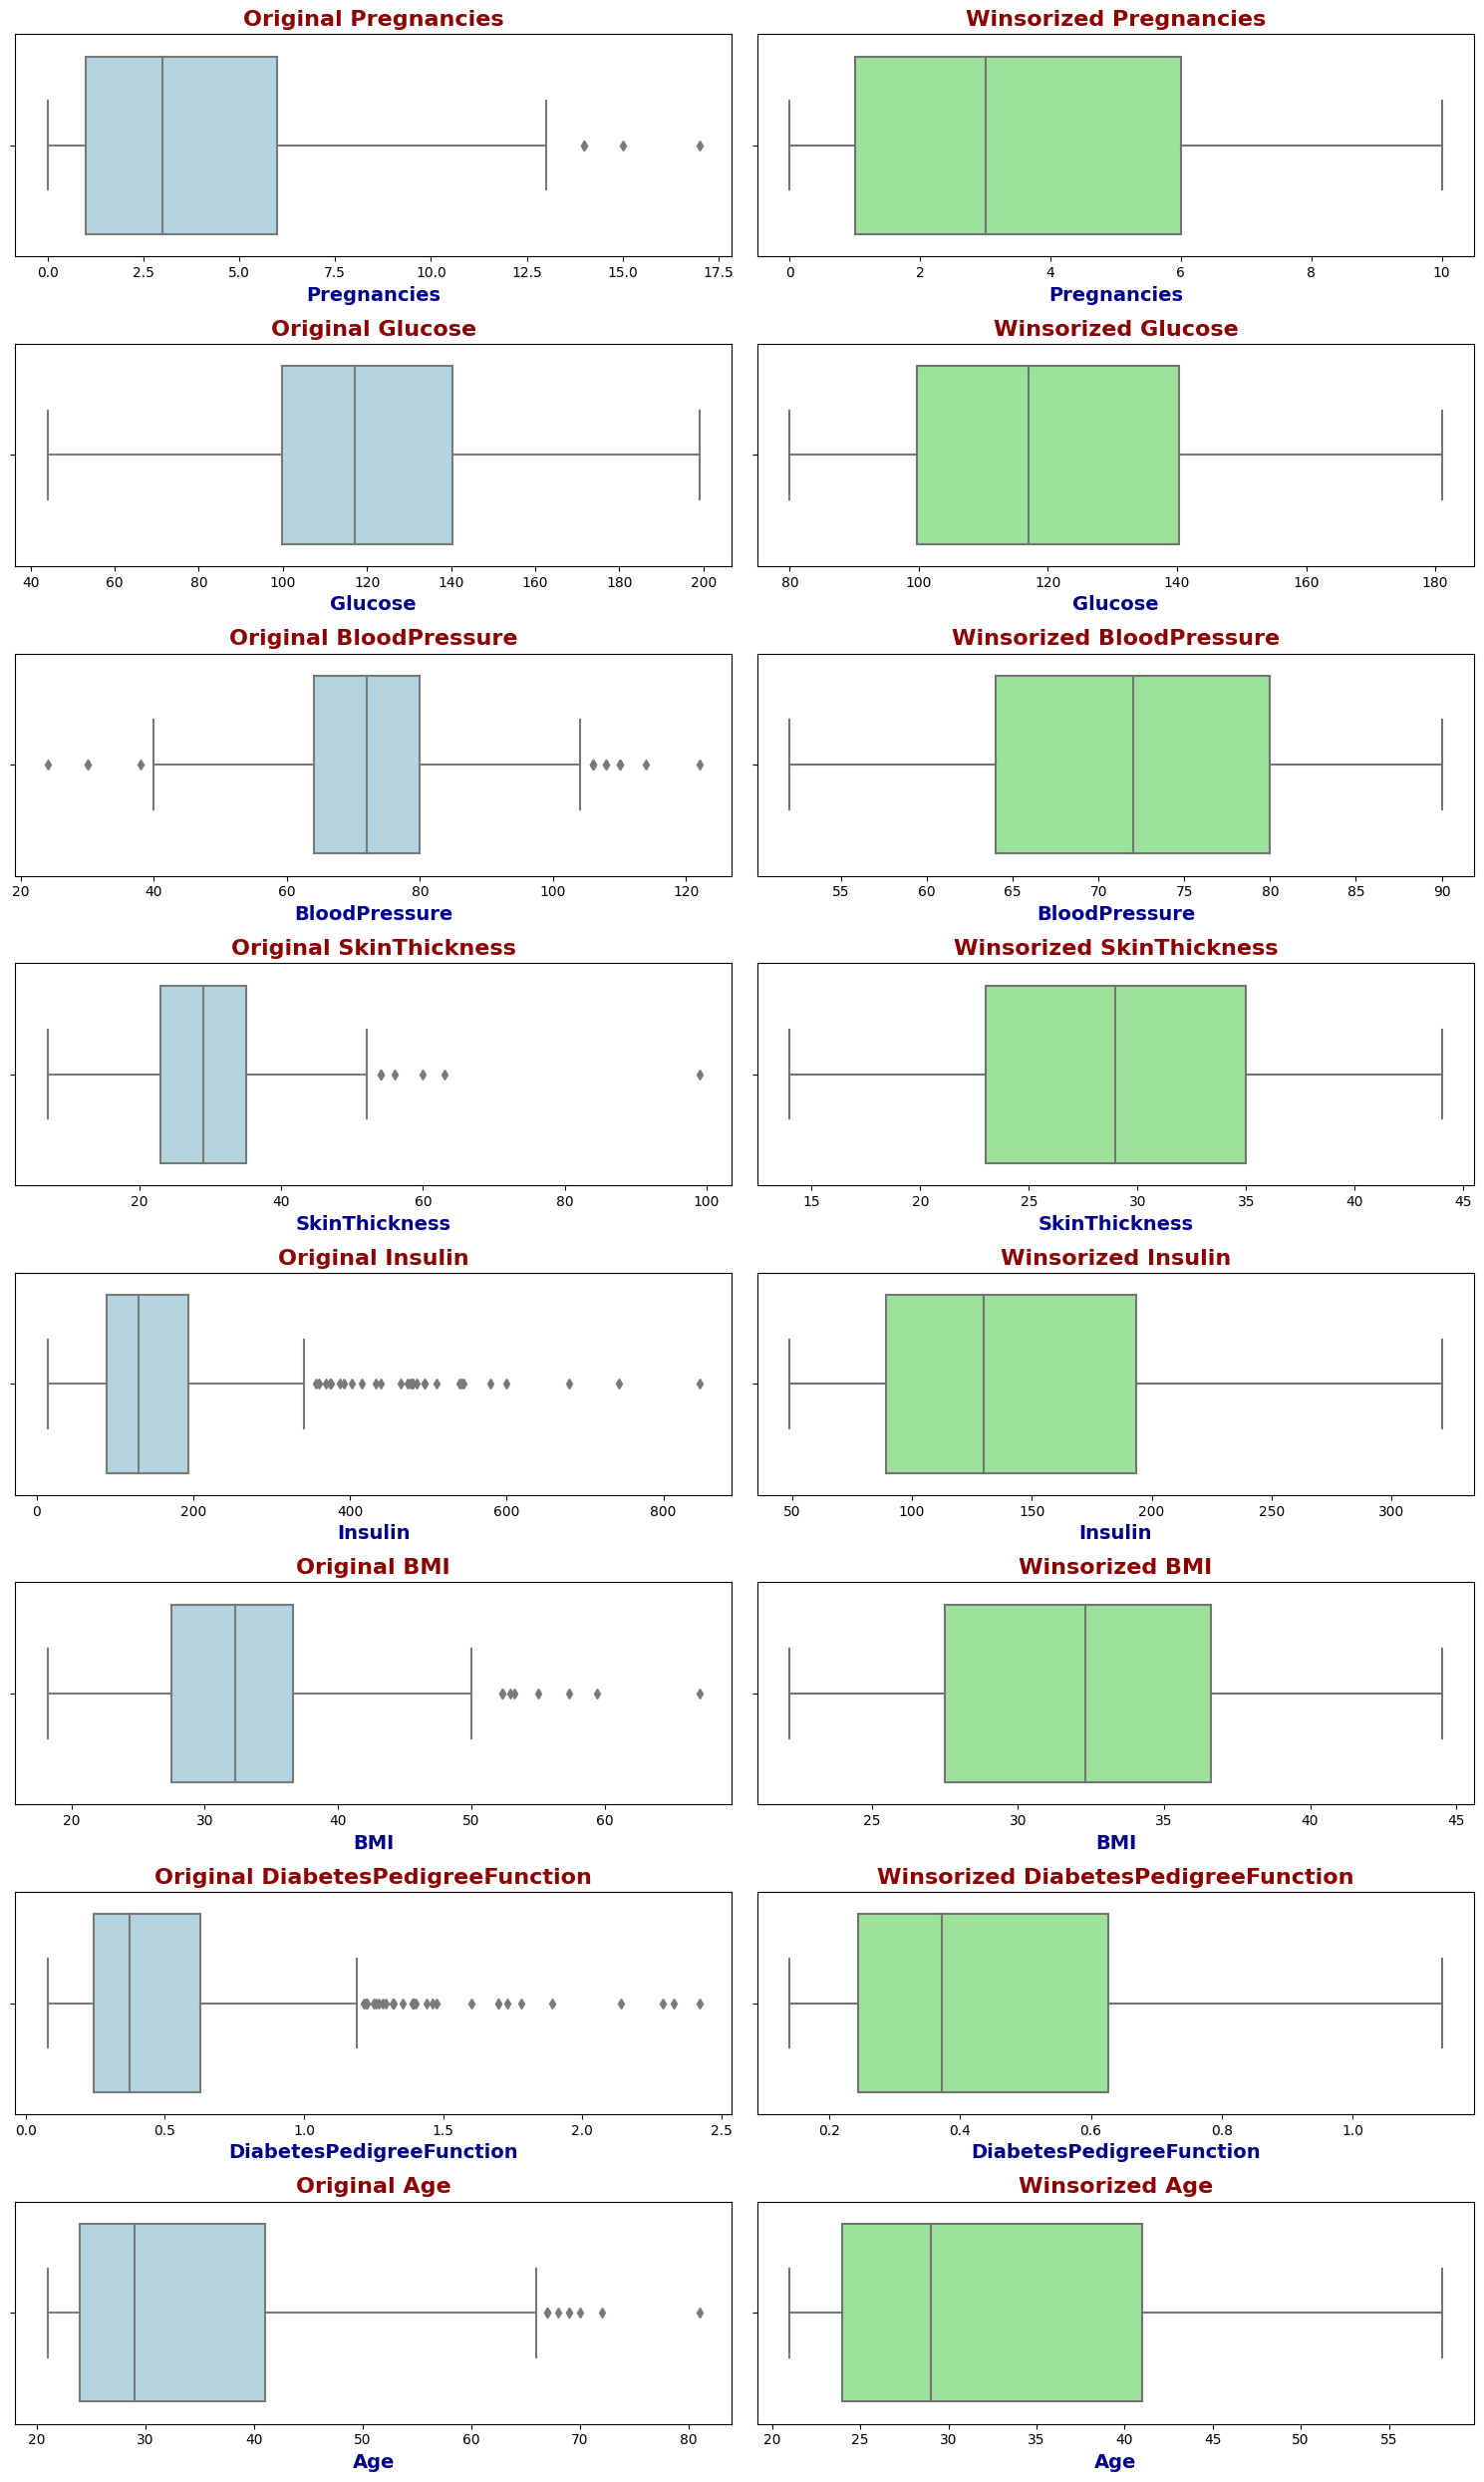

In [91]:
# Setting up the figure and axes
fig, axes = plt.subplots(nrows=len(data_winsorized.columns) - 1, ncols=2, figsize=(15, 25))

# Loop through each column (excluding 'Outcome') to plot boxplots
for i, column in enumerate(data_winsorized.columns.drop('Outcome')):
    # Before Winsorizing
    sns.boxplot(x=X_imputed_df[column], ax=axes[i, 0], color='lightblue')
    axes[i, 0].set_title(f'Original {column}', fontdict=title_font)
    axes[i, 0].set_xlabel(column, fontdict=axis_font)

    # Winsorized data
    sns.boxplot(x=data_winsorized[column], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Winsorized {column}', fontdict=title_font)
    axes[i, 1].set_xlabel(column, fontdict=axis_font)

# Adjust the layout
plt.tight_layout()
plt.show()

### 4.6 Data Distribution<a name = 21></a>

In [ ]:
# Calculate skewness for the Winsorized data
skewness_winsorized = data_winsorized.drop(columns='Outcome').skew()
skewness_winsorized_df = pd.DataFrame(skewness_winsorized, columns=['Skewness (Winsorized)']).reset_index()
skewness_winsorized_df.rename(columns={'index': 'Variable'}, inplace=True)

skewness_winsorized_df

,Variable,Skewness (Winsorized)
0,Pregnancies,0.612585
1,Glucose,0.531014
2,BloodPressure,-0.055003
3,SkinThickness,0.034369
4,Insulin,0.746791
5,BMI,0.229824
6,DiabetesPedigreeFunction,0.961040
7,Age,0.877706


- Pregnancies: 0.613 (Right-skewed)
- Glucose: 0.531 (Right-skewed)
- BloodPressure: -0.055 (Approximately symmetric)
- SkinThickness: 0.034 (Approximately symmetric)
- Insulin: 0.747 (Right-skewed)
- BMI: 0.230 (Slightly right-skewed)
- DiabetesPedigreeFunction: 0.961 (Right-skewed)
- Age: 0.878 (Right-skewed)

In [93]:
from scipy.stats import boxcox

# Apply logarithmic transformation
data_log = data_winsorized.drop(columns='Outcome').apply(lambda x: np.log(x + 1))
skewness_log = data_log.skew()

# Apply square root transformation
data_sqrt = data_winsorized.drop(columns='Outcome').apply(np.sqrt)
skewness_sqrt = data_sqrt.skew()

# Apply Box-Cox transformation
data_boxcox = data_winsorized.drop(columns='Outcome').copy()
skewness_boxcox = {}
for column in data_boxcox.columns:
    data_boxcox[column], _ = boxcox(data_boxcox[column] + 1)  # adding 1 to ensure all values are positive
    skewness_boxcox[column] = pd.Series(data_boxcox[column]).skew()

skewness_log_df = pd.DataFrame(skewness_log).reset_index().rename(columns={'index': 'Variable', 0: 'Skewness (Log)'})
skewness_sqrt_df = pd.DataFrame(skewness_sqrt).reset_index().rename(columns={'index': 'Variable', 0: 'Skewness (Sqrt)'})
skewness_boxcox_df = pd.DataFrame(list(skewness_boxcox.items()), columns=['Variable', 'Skewness (Box-Cox)'])

# Merge the dataframes for a consolidated view
skewness_transformed_df = pd.merge(pd.merge(skewness_log_df, skewness_sqrt_df, on='Variable'), skewness_boxcox_df, on='Variable')
skewness_transformed_df

,Variable,Skewness (Log),Skewness (Sqrt),Skewness (Box-Cox)
0,Pregnancies,-0.307450,-0.274132,-0.067185
1,Glucose,0.154150,0.342659,0.023528
2,BloodPressure,-0.339187,-0.197267,-0.038447
3,SkinThickness,-0.492549,-0.234204,-0.069736
4,Insulin,-0.093882,0.337549,-0.013876
5,BMI,-0.097298,0.060894,-0.013566
6,DiabetesPedigreeFunction,0.680246,0.526724,0.151488
7,Age,0.501697,0.681237,0.139515


The **Box-Cox** transformation seems to be the most effective as it brings the skewness values closest to zero for most of the variables.

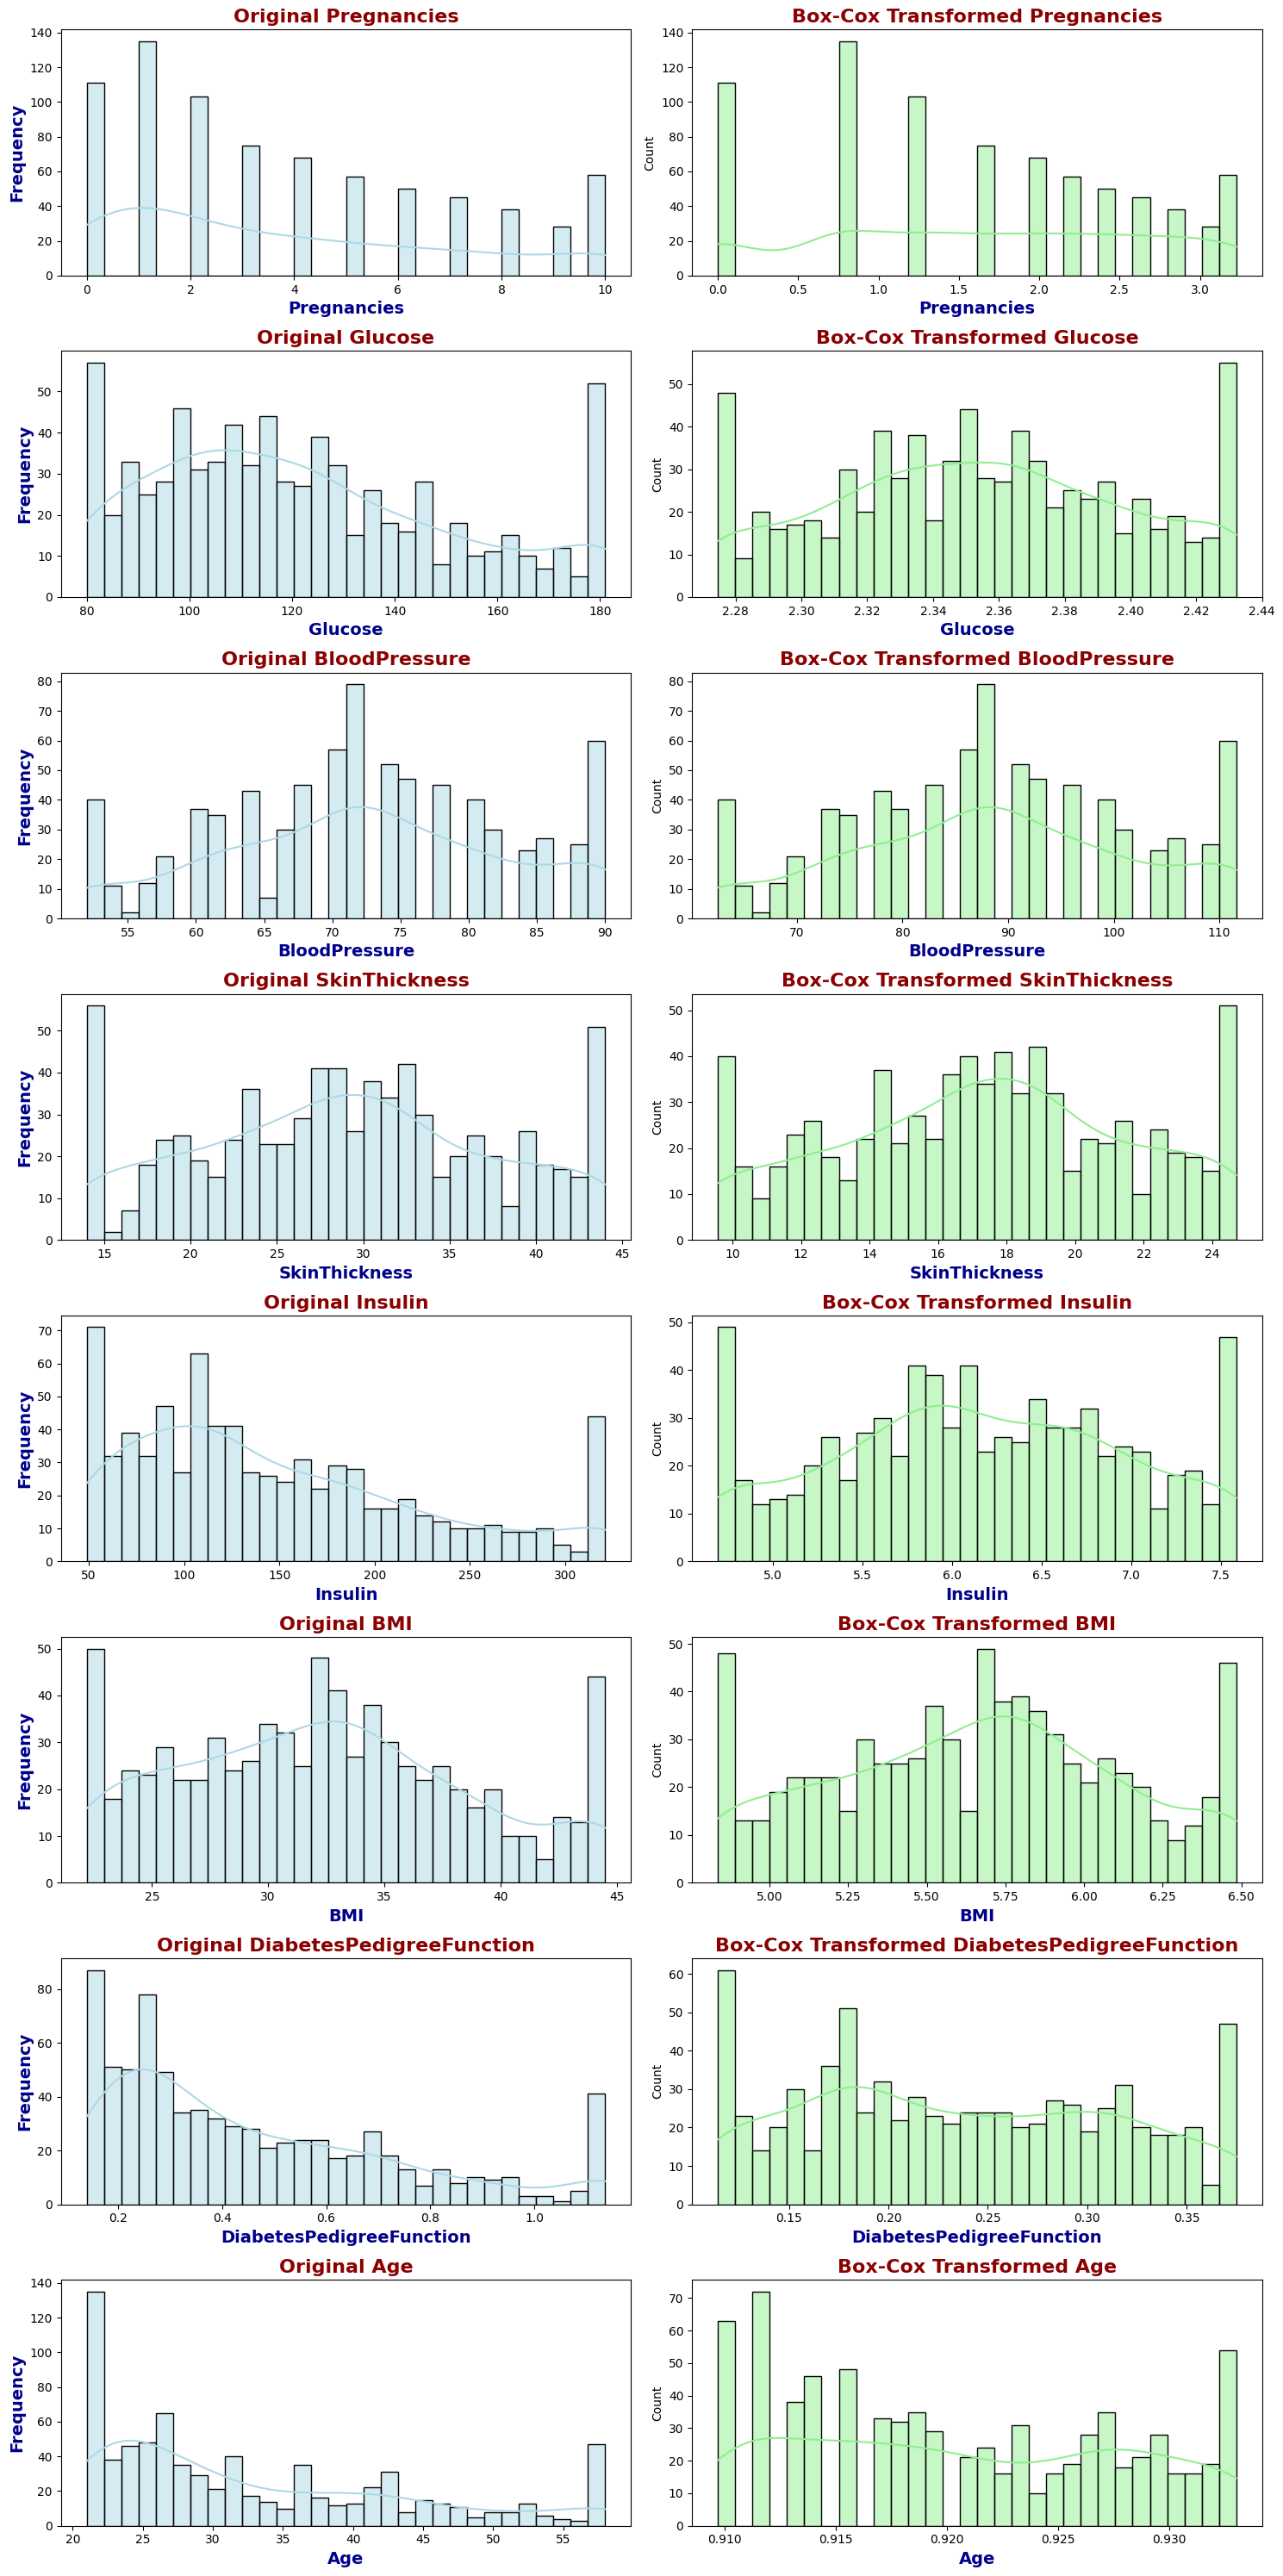

In [95]:
# Setting up the figure and axes for side-by-side comparison
fig, axes = plt.subplots(nrows=len(data_boxcox.columns), ncols=2, figsize=(15, 30))

# Loop through each column to plot histograms
for i, column in enumerate(data_boxcox.columns):
    # Original data (before Box-Cox transformation)
    sns.histplot(data_winsorized[column], ax=axes[i, 0], kde=True, color='lightblue', bins=30)
    axes[i, 0].set_title(f'Original {column}', fontdict=title_font)
    axes[i, 0].set_ylabel('Frequency', fontdict=axis_font)
    axes[i, 0].set_xlabel(column, fontdict=axis_font)

    # Data after Box-Cox transformation
    sns.histplot(data_boxcox[column], ax=axes[i, 1], kde=True, color='lightgreen', bins=30)
    axes[i, 1].set_title(f'Box-Cox Transformed {column}', fontdict=title_font)
    axes[i, 1].set_xlabel(column, fontdict=axis_font)

# Adjust the layout
plt.tight_layout()
plt.show()

In [96]:
data_boxcox

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.470648,2.397201,88.160724,20.481616,7.264648,5.779337,0.302303,0.930888
1,0.753155,2.287828,80.416950,17.547196,5.099433,5.233951,0.221785,0.921464
2,2.880770,2.432183,77.844759,18.340587,6.792697,4.940357,0.311648,0.922239
3,0.753155,2.297675,80.416950,14.489236,5.636113,5.358820,0.131496,0.909689
4,0.000000,2.383144,62.516639,20.481616,6.529143,6.401000,0.375042,0.922968
...,...,...,...,...,...,...,...,...
763,3.226195,2.324007,93.344730,24.703287,6.638631,5.728711,0.133945,0.933001
764,1.254430,2.361349,85.575055,16.543137,6.107021,6.001527,0.217455,0.917791
765,2.230879,2.359770,88.160724,14.489236,5.900230,5.199803,0.174900,0.920637
766,0.753155,2.367497,72.714765,16.644188,6.388012,5.518076,0.221006,0.929908


### 4.7 Scaling Data <a name = 22></a>

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
data_boxcox_scaled = scaler.fit_transform(data_boxcox)

In [100]:
data_boxcox_scaled

array([[ 0.84240604,  0.96869724, -0.01955863, ...,  0.27016265,
         0.85245959,  1.39900855],
       [-0.84997451, -1.47449207, -0.59332466, ..., -0.91729406,
        -0.18288448,  0.12166982],
       [ 1.24653211,  1.75013889, -0.78390824, ..., -1.55652964,
         0.97262482,  0.2267637 ],
       ...,
       [ 0.60614292,  0.13255404, -0.01955863, ..., -0.99164392,
        -0.78575284,  0.00959461],
       [-0.84997451,  0.30515556, -1.16400919, ..., -0.29867448,
        -0.19290258,  1.26624758],
       [-0.84997451, -1.04732039, -0.21114079, ..., -0.24810415,
        -0.37060798, -1.04545336]])

In [101]:
data_boxcox_df = pd.DataFrame(data_boxcox_scaled, columns=data_boxcox.columns, index=data_boxcox.index)

In [102]:
data_boxcox_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.842406,0.968697,-0.019559,0.740160,1.377079,0.270163,0.852460,1.399009
1,-0.849975,-1.474492,-0.593325,0.045089,-1.289791,-0.917294,-0.182884,0.121670
2,1.246532,1.750139,-0.783908,0.233018,0.795782,-1.556530,0.972625,0.226764
3,-0.849975,-1.254536,-0.593325,-0.679244,-0.628768,-0.645419,-1.343867,-1.474295
4,-1.592118,0.654682,-1.919628,0.740160,0.471166,1.623697,1.787773,0.325504
...,...,...,...,...,...,...,...,...
763,1.586906,-0.666332,0.364544,1.740139,0.606021,0.159936,-1.312374,1.685355
764,-0.356029,0.167825,-0.211141,-0.192741,-0.048756,0.753933,-0.238567,-0.376157
765,0.606143,0.132554,-0.019559,-0.679244,-0.303459,-0.991644,-0.785753,0.009595
766,-0.849975,0.305156,-1.164009,-0.168805,0.297337,-0.298674,-0.192903,1.266248


In [103]:
data_clean_scaled = pd.concat([data_boxcox_df, df['Outcome']], axis=1)

In [104]:
data_clean_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.842406,0.968697,-0.019559,0.740160,1.377079,0.270163,0.852460,1.399009,1
1,-0.849975,-1.474492,-0.593325,0.045089,-1.289791,-0.917294,-0.182884,0.121670,0
2,1.246532,1.750139,-0.783908,0.233018,0.795782,-1.556530,0.972625,0.226764,1
3,-0.849975,-1.254536,-0.593325,-0.679244,-0.628768,-0.645419,-1.343867,-1.474295,0
4,-1.592118,0.654682,-1.919628,0.740160,0.471166,1.623697,1.787773,0.325504,1
...,...,...,...,...,...,...,...,...,...
763,1.586906,-0.666332,0.364544,1.740139,0.606021,0.159936,-1.312374,1.685355,0
764,-0.356029,0.167825,-0.211141,-0.192741,-0.048756,0.753933,-0.238567,-0.376157,0
765,0.606143,0.132554,-0.019559,-0.679244,-0.303459,-0.991644,-0.785753,0.009595,0
766,-0.849975,0.305156,-1.164009,-0.168805,0.297337,-0.298674,-0.192903,1.266248,1


In [105]:
data_clean_scaled.to_csv('diabetes_clean_scaled.csv', index = False)